In [8]:
import pandas as pd

df_12h = pd.read_csv('Total-Load-Day-Ahead-Actual_2018-2023-12Hours-Resampled.csv')

#Column Names
column_headers = list(df_12h)
print(column_headers)

['Time', 'Load Forecast', 'Actual Load']


In [9]:
# Descriptive Stats

print(df_12h[['Load Forecast', 'Actual Load']].describe())
print("")
print(df_12h.head())


       Load Forecast  Actual Load
count    3113.000000  3113.000000
mean     3504.036602  3394.268907
std       556.641480   520.727940
min      2353.041667  2341.208333
25%      3068.666667  2986.750000
50%      3467.500000  3358.458333
75%      3886.125000  3770.791667
max      4886.333333  4831.791667

               Time  Load Forecast  Actual Load
0  01/01/2018 00:00    2595.333333  2626.000000
1  01/01/2018 12:00    3411.833333  3433.375000
2  02/01/2018 00:00    3100.791667  3298.000000
3  02/01/2018 12:00    4180.916667  4191.208333
4  03/01/2018 00:00    3341.166667  3375.541667


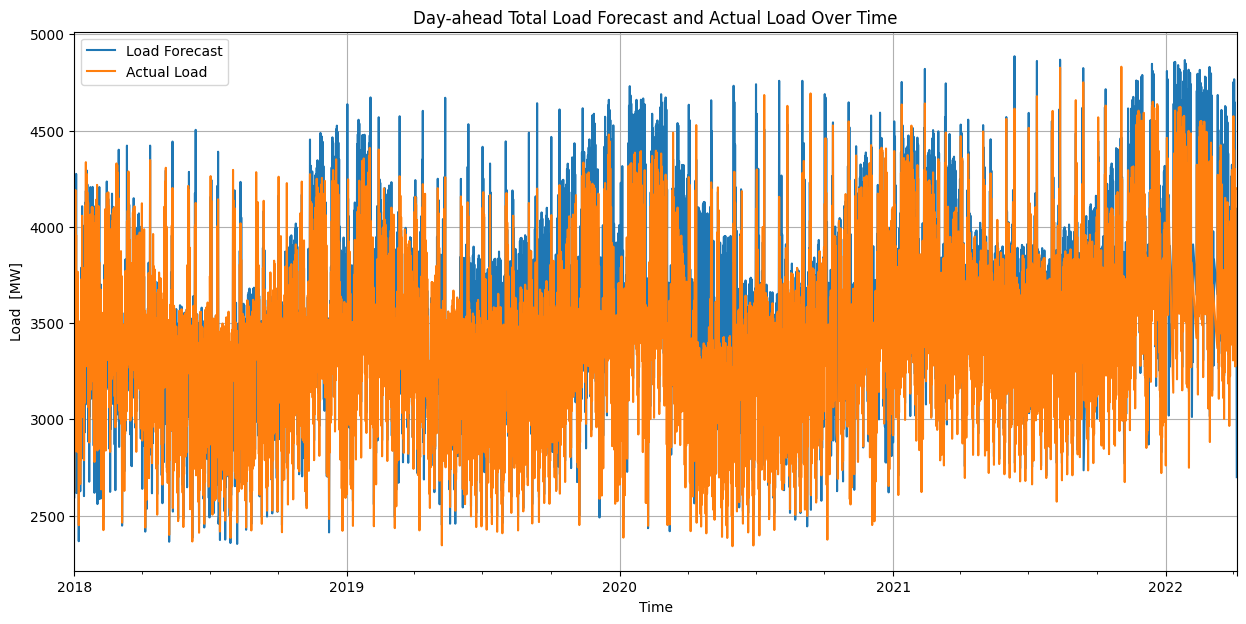

In [10]:
# Visualize the Time Series

import matplotlib.pyplot as plt

import pandas as pd

#Coversion of time from index to dateTime type
df_12h['Time'] = pd.to_datetime(df_12h['Time'], format = '%d/%m/%Y %H:%M')
df_12h = df_12h.set_index('Time')


df_12h[['Load Forecast', 'Actual Load']].plot(figsize=(15, 7))
plt.title('Day-ahead Total Load Forecast and Actual Load Over Time')
plt.ylabel('Load  [MW]')
plt.xlabel('Time')
plt.grid(True)
plt.show()


#Time ???? 2023 data can be ignored ? till 2023 ? 


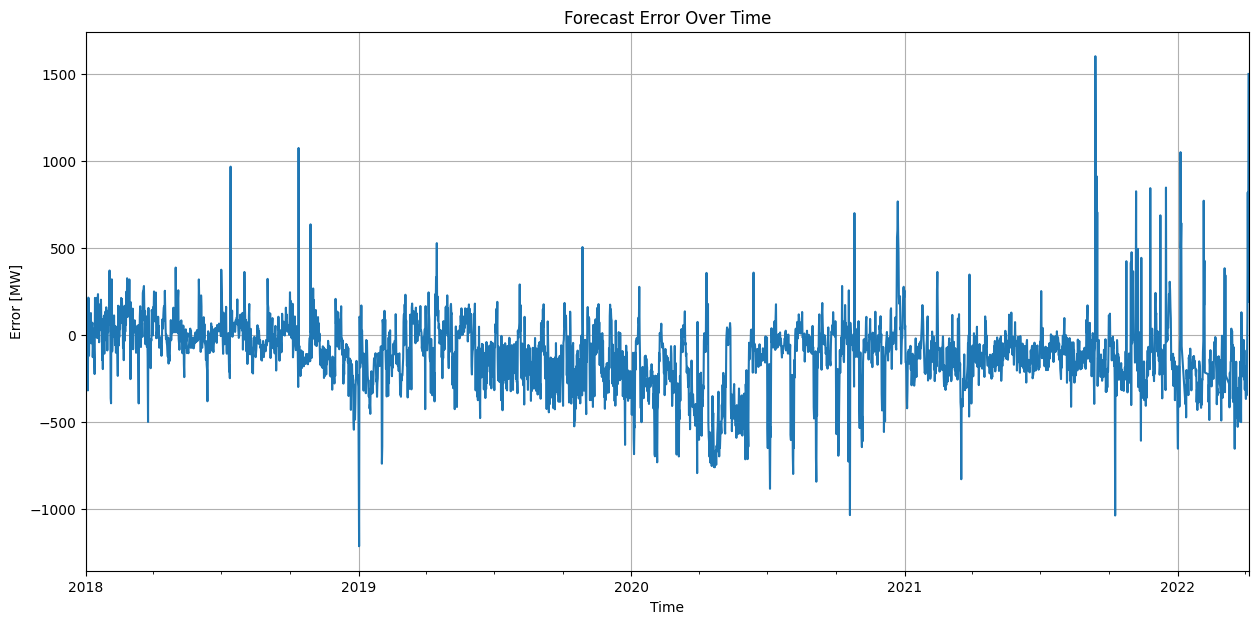

datetime64[ns]


In [11]:
# Visualize Forecast Error

import pandas as pd


df_12h['Error'] = df_12h['Actual Load'] - df_12h['Load Forecast']

df_12h['Error'].plot(figsize=(15, 7))
plt.title('Forecast Error Over Time')
plt.ylabel('Error [MW]')
plt.xlabel('Time')
plt.grid(True)
plt.show()

# Check the datatype of the index
print(df_12h.index.dtype)



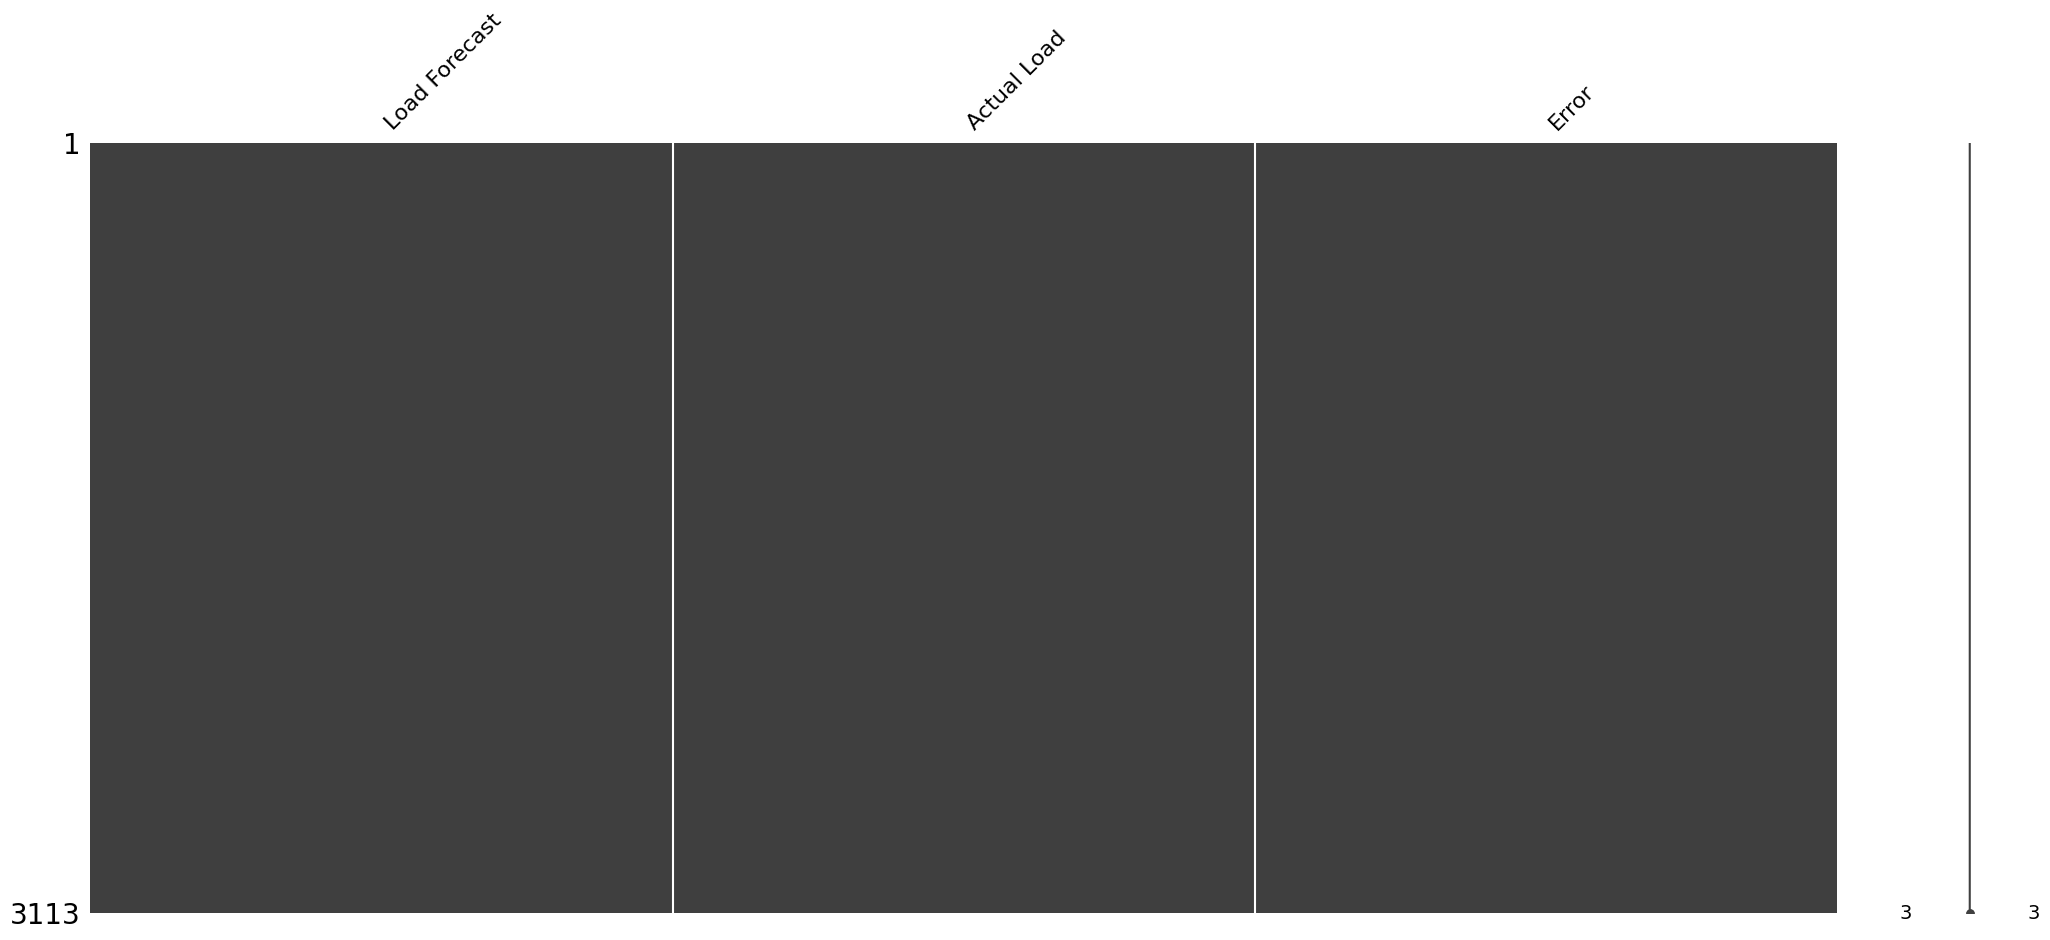

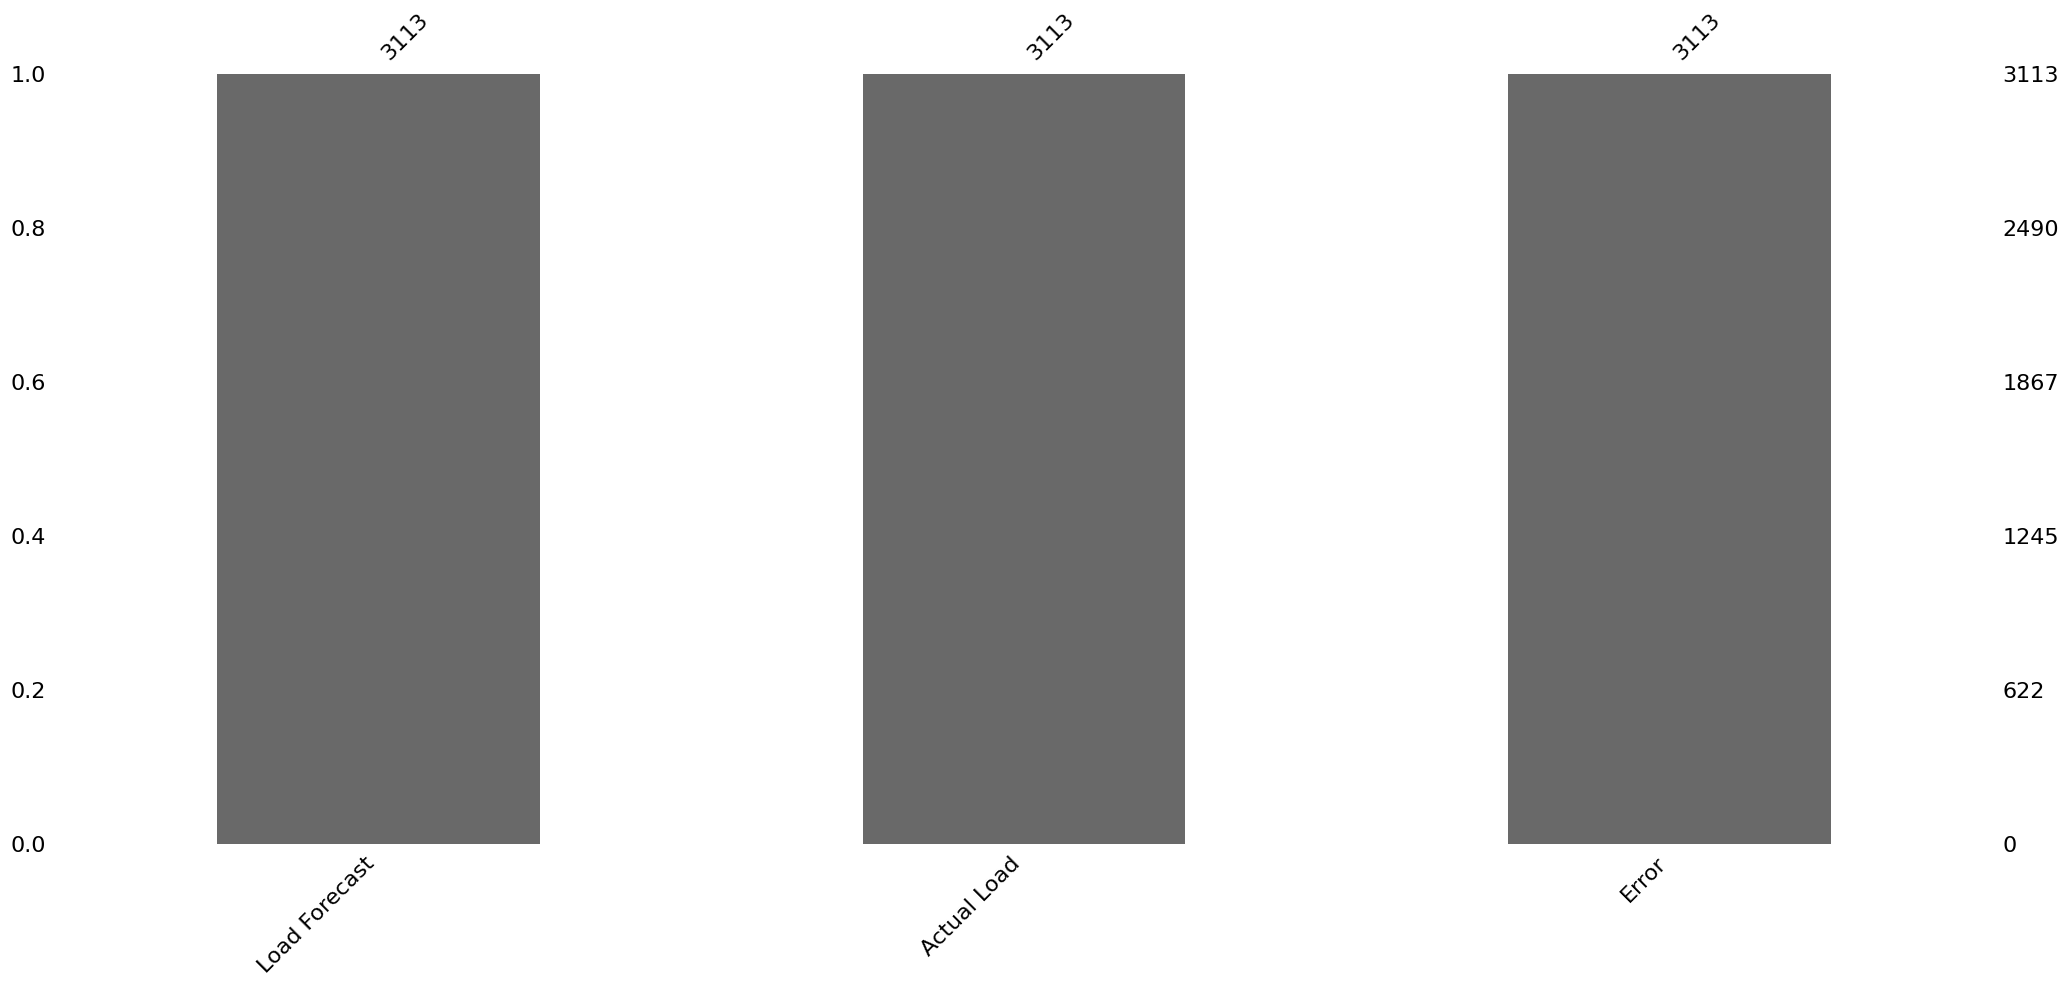


Load Forecast    0
Actual Load      0
Error            0
dtype: int64
 

Total missing values across all variables:  0

Number of duplicated timestamps:  0


In [12]:
# Missing values


import missingno as msno

df_sliced = df_12h['2018-01-01':'2022-12-31']


# Then we plot the missing values
msno.matrix(df_sliced)
plt.show()


print("")

msno.bar(df_sliced)
plt.show()


print("")

print(df_12h.isna().sum())
print(" ")


print("")
total_missing_values = df_sliced.isna().sum().sum()
print("Total missing values across all variables: ", total_missing_values)

print("")
duplicated_rows = df_sliced.index.duplicated()
print("Number of duplicated timestamps: ", duplicated_rows.sum())

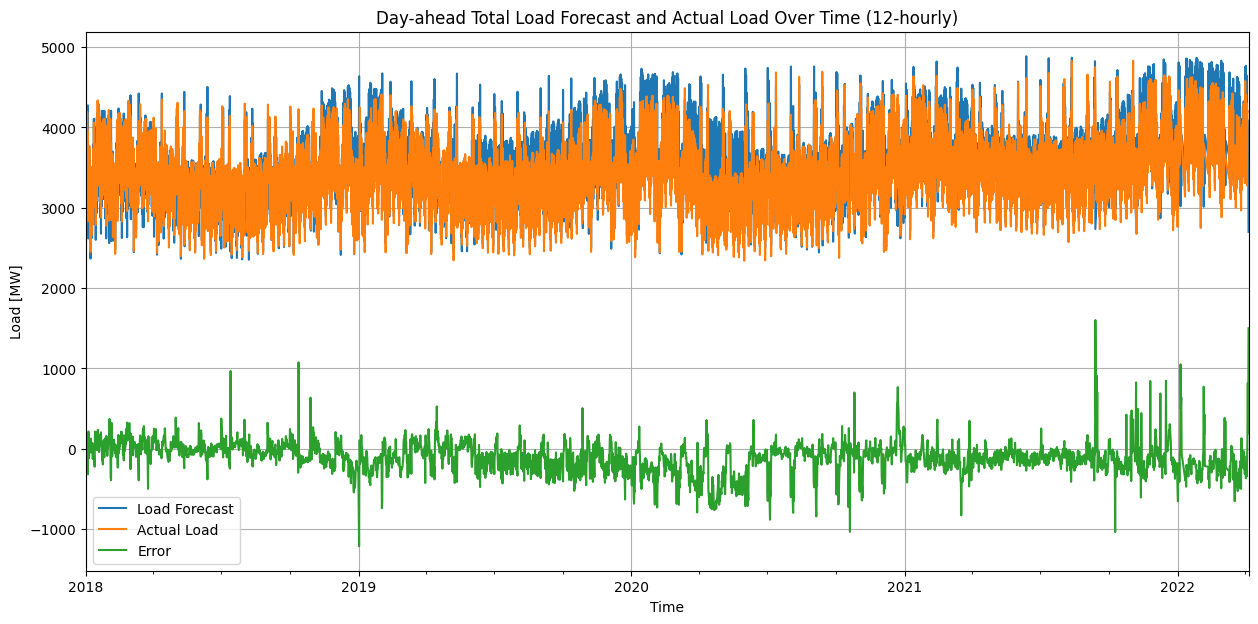

In [13]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting the 12-hourly data
df_12h.plot(figsize=(15, 7))
plt.title('Day-ahead Total Load Forecast and Actual Load Over Time (12-hourly)')
plt.ylabel('Load [MW]')
plt.xlabel('Time')
plt.grid(True)
plt.show()
